In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load CSV File
df = pd.read_csv("Daily.csv")
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [ ]:
print(df.isnull().sum())
df['Subcategory'].fillna('Unknown', inplace=True)
df['Note'].fillna('Unknown', inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df.drop_duplicates(inplace=True)

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64


/var/folders/5n/9hyxc0vn6h10j0_jgl1v4x540000gn/T/ipykernel_2071/3336885760.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Subcategory'].fillna('Unknown', inplace=True)
/var/folders/5n/9hyxc0vn6h10j0_jgl1v4x540000gn/T/ipykernel_2071/3336885760.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

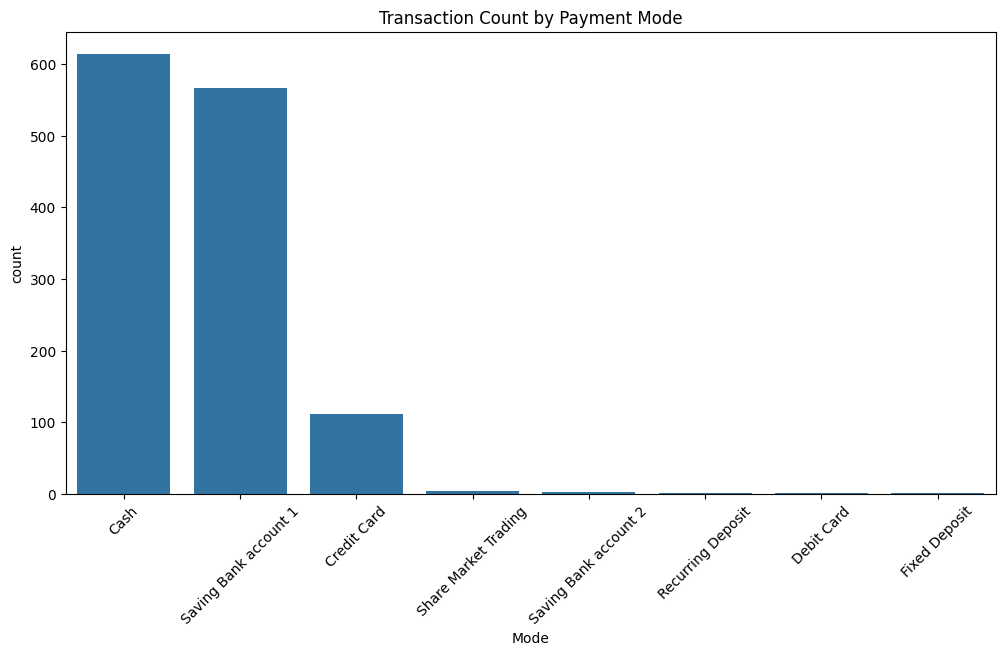

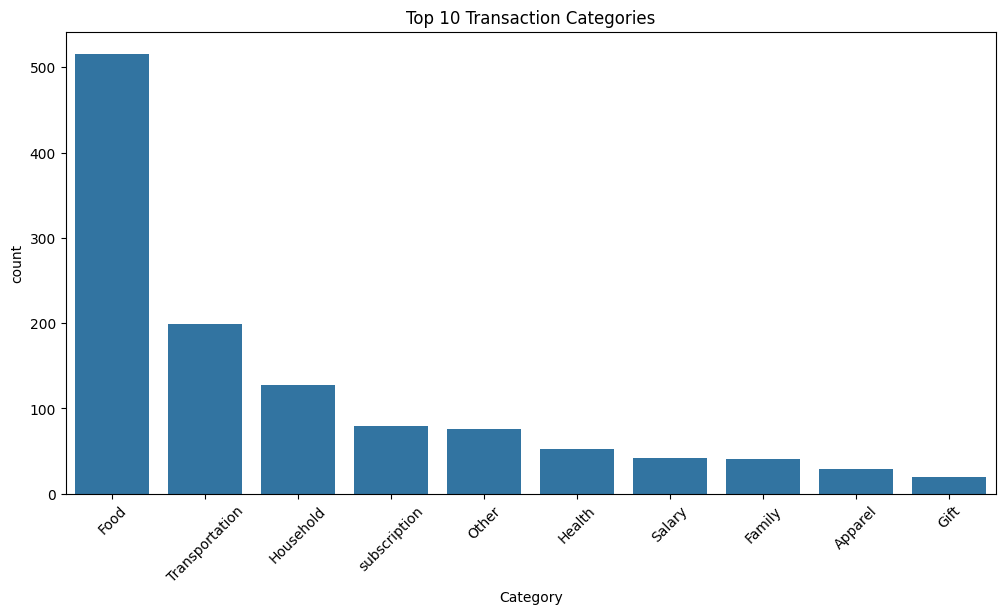

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Mode', order=df['Mode'].value_counts().index)
plt.title('Transaction Count by Payment Mode')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().head(10).index)
plt.title('Top 10 Transaction Categories')
plt.xticks(rotation=45)
plt.show()

/var/folders/5n/9hyxc0vn6h10j0_jgl1v4x540000gn/T/ipykernel_2071/2197126943.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M')['Amount'].sum()


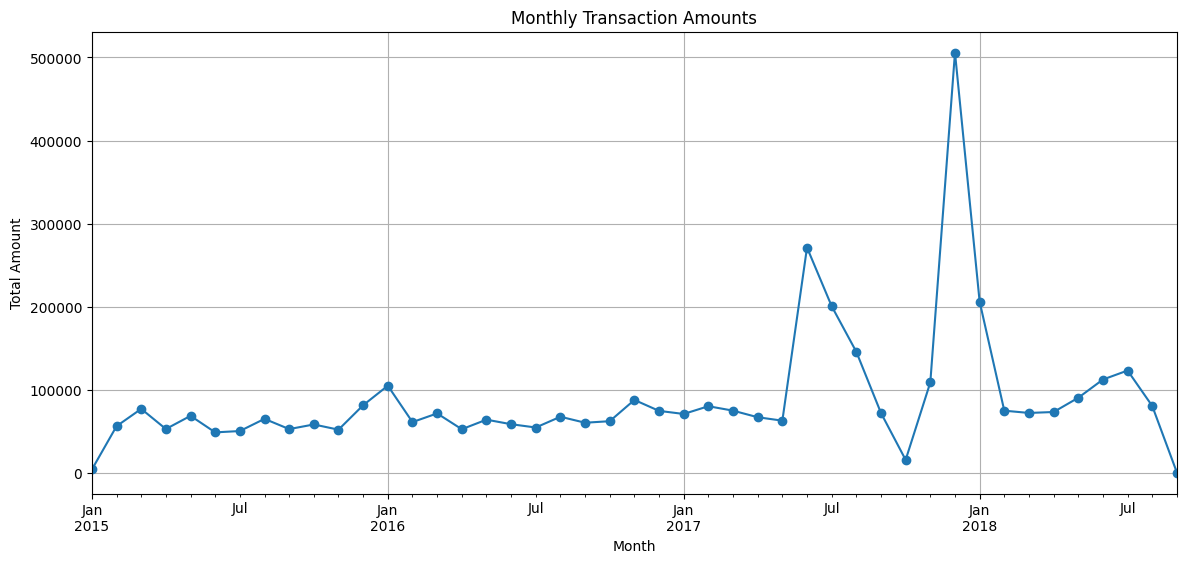

In [ ]:
df.set_index('Date', inplace=True)

# Monthly Transaction Amounts
monthly = df.resample('M')['Amount'].sum()
plt.figure(figsize=(14,6))
monthly.plot(marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

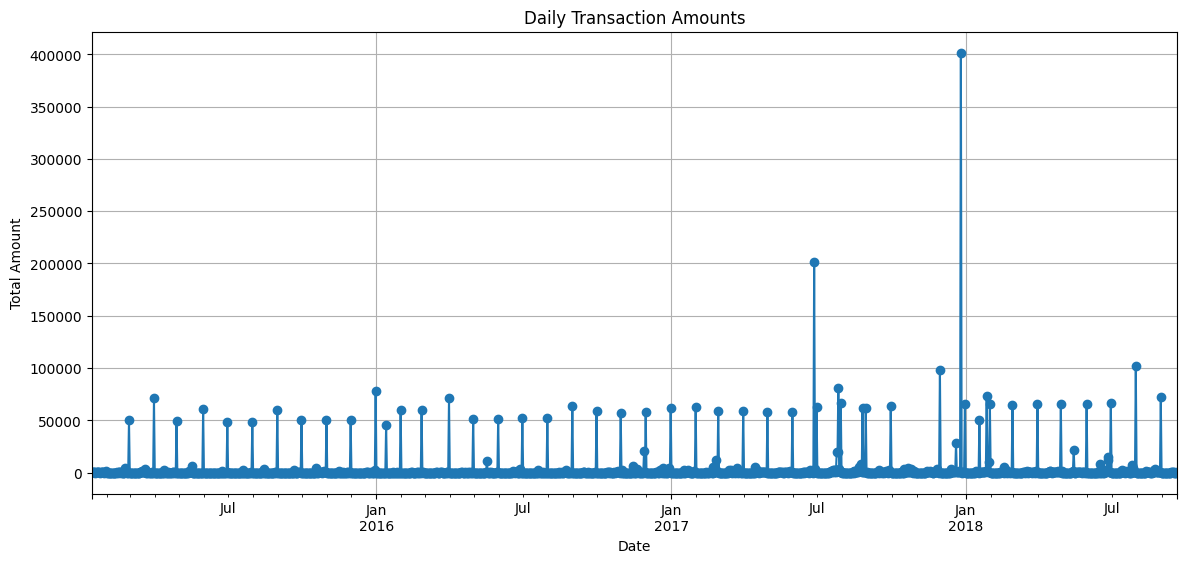

In [ ]:
daily = df.resample('D')['Amount'].sum()
plt.figure(figsize=(14,6))
daily.plot(marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

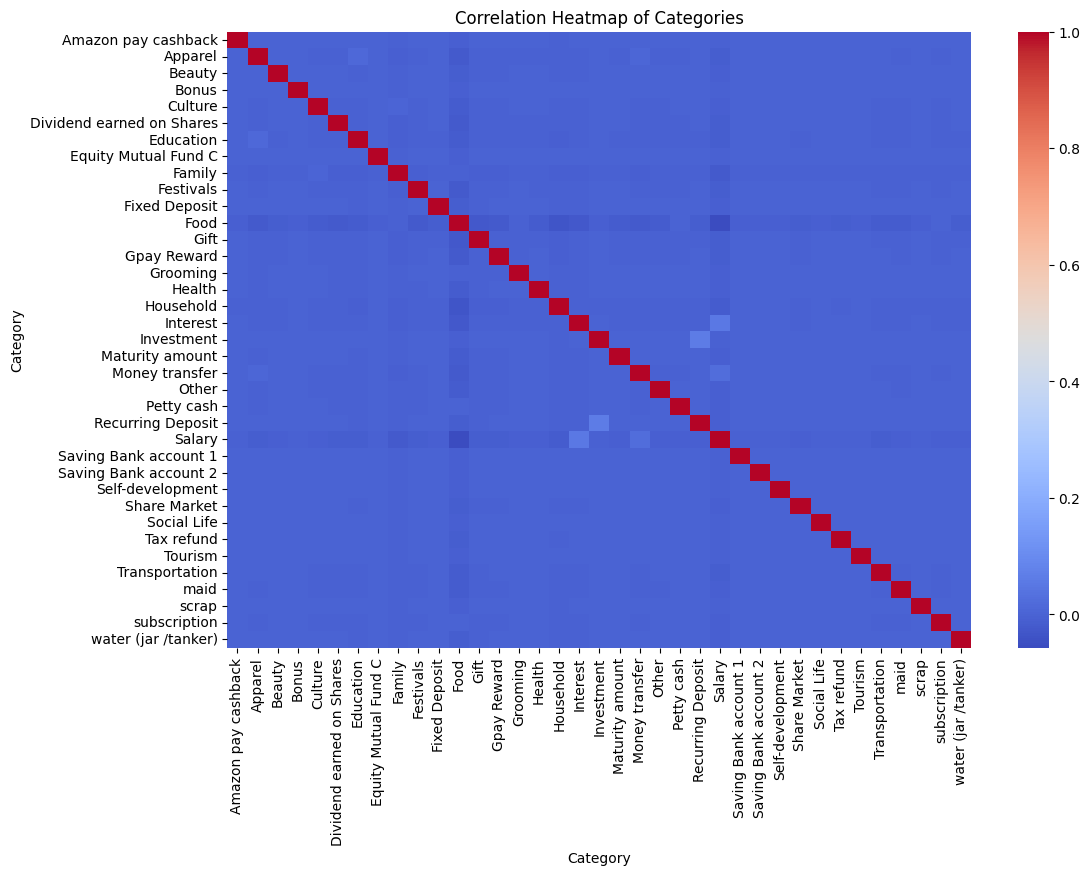

In [ ]:
pivot = df.pivot_table(index=df.index, columns='Category', values='Amount', aggfunc='sum', fill_value=0)
corr = pivot.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Categories')
plt.show()

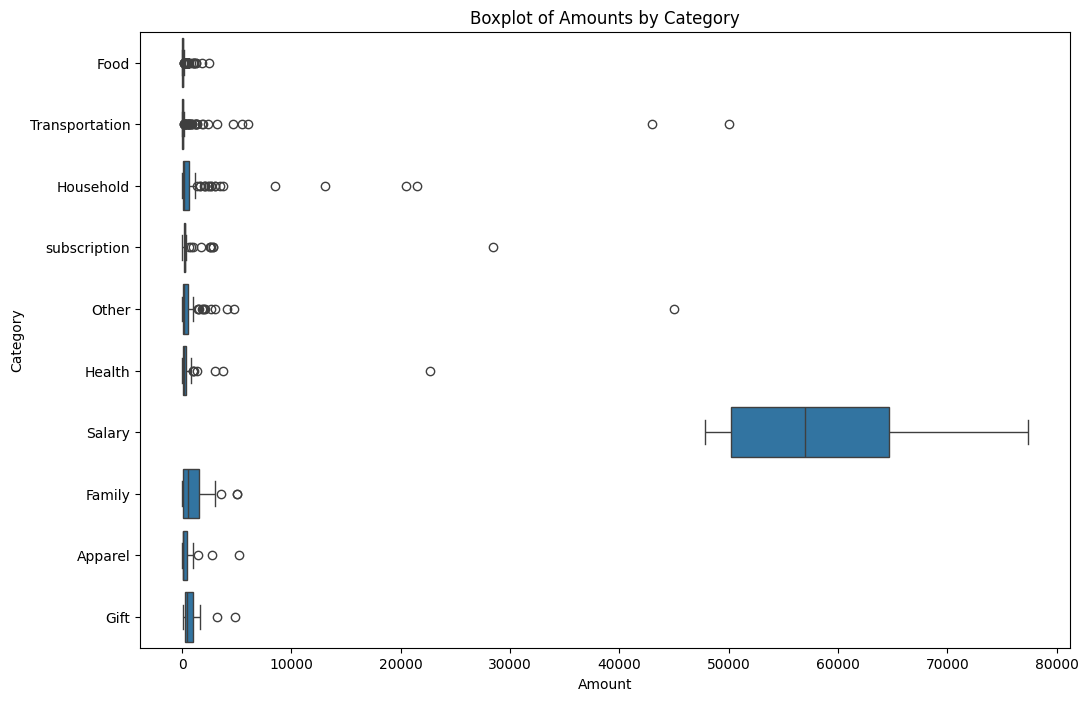

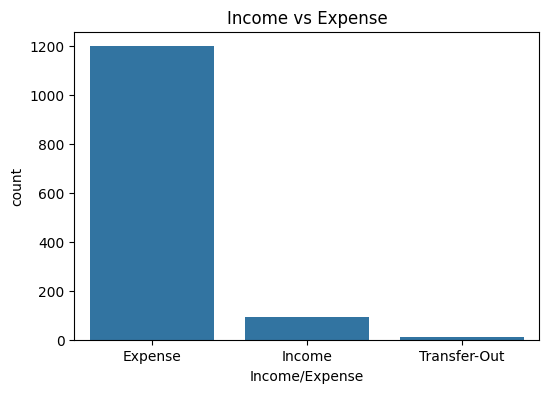

In [ ]:
top_categories = df['Category'].value_counts().head(10).index.drop_duplicates()

# Drop rows where Category is NaN or not in top_categories
filtered_df = df[df['Category'].isin(top_categories)]
# Boxplot by Category

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='Amount', y='Category', order=top_categories)
plt.title('Boxplot of Amounts by Category')
plt.show()
# Income vs Expense
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Income/Expense')
plt.title('Income vs Expense')
plt.show()